In [ ]:
!pip install keras-tcn --quiet
!pip install yfinance --quiet

/tmp/ipython-input-1750386975.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price           Close
Ticker           AAPL
Date                 
2018-01-02  40.341881
2018-01-03  40.334862
2018-01-04  40.522217
2018-01-05  40.983582
2018-01-08  40.831348

Форма датасета: (1509, 1)


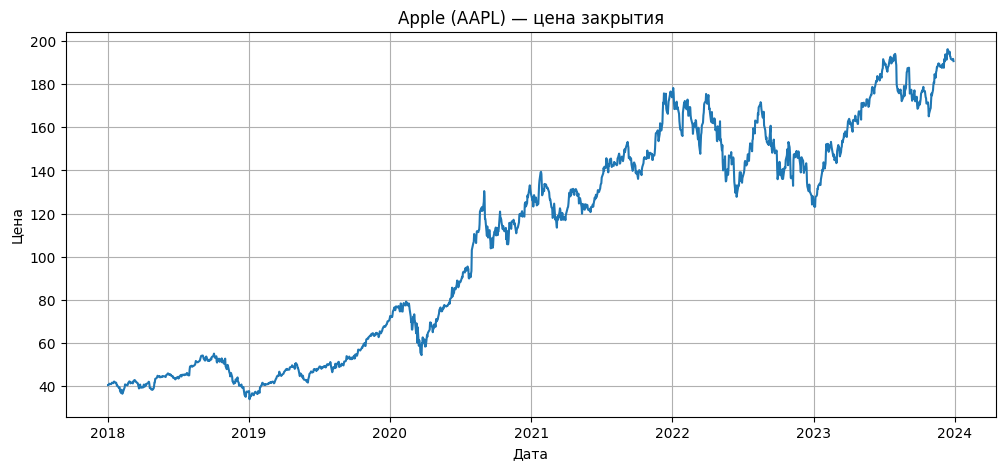

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

data = data[['Close']]

print(data.head())
print("\nФорма датасета:", data.shape)

plt.figure(figsize=(12,5))
plt.plot(data.index, data['Close'])
plt.title("Apple (AAPL) — цена закрытия")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=['Close'])

scaled_data.head()

,Close
Date,
2018-01-02,0.040270
2018-01-03,0.040227
2018-01-04,0.041380
2018-01-05,0.044220
2018-01-08,0.043283


In [ ]:
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data.values, window_size)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1479, 30, 1)
y shape: (1479, 1)


In [ ]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]
X_train.shape, X_test.shape

((1183, 30, 1), (296, 30, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

def create_base_tcn():
    model = Sequential([
        TCN(
            nb_filters=32,
            kernel_size=3,
            dilations=[1, 2, 4, 8],
            nb_stacks=1,
            dropout_rate=0.1,
            activation='relu',
            input_shape=(30, 1)
        ),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

model = create_base_tcn()
model.summary()

/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn_3 (TCN)                     │ (None, 32)             │        21,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.9486 - val_loss: 0.0595
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1009 - val_loss: 0.0067
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0523 - val_loss: 0.0083
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - val_loss: 0.0210
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0273 - val_loss: 0.0129
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0206 - val_loss: 0.0073
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - val_loss: 0.0089
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0171 - val_loss: 0.0059
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0172 - val_loss: 0.0223
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0110 - val_loss: 0.0048
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred_base = model.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))
rmse_base

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


np.float64(0.06399306552022888)

In [ ]:
!pip install scikeras --quiet

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from scikeras.wrappers import KerasRegressor

window_size = 30

def create_tcn_model(kernel_size=3, nb_filters=32, nb_stacks=1, dropout_rate=0.1):
    model = Sequential([
        TCN(
            nb_filters=nb_filters,
            kernel_size=kernel_size,
            dilations=[1, 2, 4, 8],
            nb_stacks=nb_stacks,
            dropout_rate=dropout_rate,
            activation='relu',
            input_shape=(window_size, 1)
        ),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class TCNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, kernel_size=3, nb_filters=32, nb_stacks=1, dropout_rate=0.1,
                 epochs=15, batch_size=32, verbose=0):
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.nb_stacks = nb_stacks
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def fit(self, X, y):
        self.model_ = create_tcn_model(
            kernel_size=self.kernel_size,
            nb_filters=self.nb_filters,
            nb_stacks=self.nb_stacks,
            dropout_rate=self.dropout_rate
        )
        self.model_.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=self.verbose
        )
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
reg = TCNRegressor()

param_grid = {
    "kernel_size": [2, 3, 5],
    "nb_filters": [32, 64],
    "nb_stacks": [1, 2],
    "dropout_rate": [0.1, 0.2]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

grid = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=1   # важно для Colab
)

grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


In [ ]:
print("Лучшие параметры:")
print(grid_result.best_params_)
print("\nЛучшая ошибка (MSE):", -grid_result.best_score_)

Лучшие параметры:
{'dropout_rate': 0.1, 'kernel_size': 5, 'nb_filters': 64, 'nb_stacks': 1}

Лучшая ошибка (MSE): 0.0019053495917781915


In [ ]:
import pandas as pd

results_df = pd.DataFrame(grid_result.cv_results_)
cols = ["mean_test_score", "std_test_score", "params", "rank_test_score"]
results_df[cols].sort_values("rank_test_score").head(10)

,mean_test_score,std_test_score,params,rank_test_score
10,-0.001905,0.001612,"{'dropout_rate': 0.1, 'kernel_size': 5, 'nb_fi...",1
20,-0.003992,0.004098,"{'dropout_rate': 0.2, 'kernel_size': 5, 'nb_fi...",2
18,-0.004653,0.001703,"{'dropout_rate': 0.2, 'kernel_size': 3, 'nb_fi...",3
23,-0.005212,0.005960,"{'dropout_rate': 0.2, 'kernel_size': 5, 'nb_fi...",4
14,-0.007953,0.005902,"{'dropout_rate': 0.2, 'kernel_size': 2, 'nb_fi...",5
0,-0.008339,0.005660,"{'dropout_rate': 0.1, 'kernel_size': 2, 'nb_fi...",6
22,-0.008755,0.008169,"{'dropout_rate': 0.2, 'kernel_size': 5, 'nb_fi...",7
11,-0.009013,0.008164,"{'dropout_rate': 0.1, 'kernel_size': 5, 'nb_fi...",8
8,-0.009842,0.007414,"{'dropout_rate': 0.1, 'kernel_size': 5, 'nb_fi...",9
6,-0.010671,0.009367,"{'dropout_rate': 0.1, 'kernel_size': 3, 'nb_fi...",10


In [ ]:
best_model = grid_result.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
rmse_best

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


np.float64(0.09421448837902094)

In [ ]:
print("RMSE базовой модели:", rmse_base)
print("RMSE оптимизированной модели:", rmse_best)

RMSE базовой модели: 0.06399306552022888
RMSE оптимизированной модели: 0.09421448837902094



Мы сравнили качество базовой TCN-модели и оптимизированной версии, параметры которой были подобраны с использованием Grid Search CV для временных рядов. Несмотря на то что Grid Search показал более низкий MSE на кросс-валидации, на тестовой выборке результирующая модель оказалась хуже. Это связано с тем, что TCN-модели с большим количеством фильтров (64) и увеличенным kernel_size имеют тенденцию к сглаживанию прогноза и могут хуже адаптироваться к локальным колебаниям временного ряда.

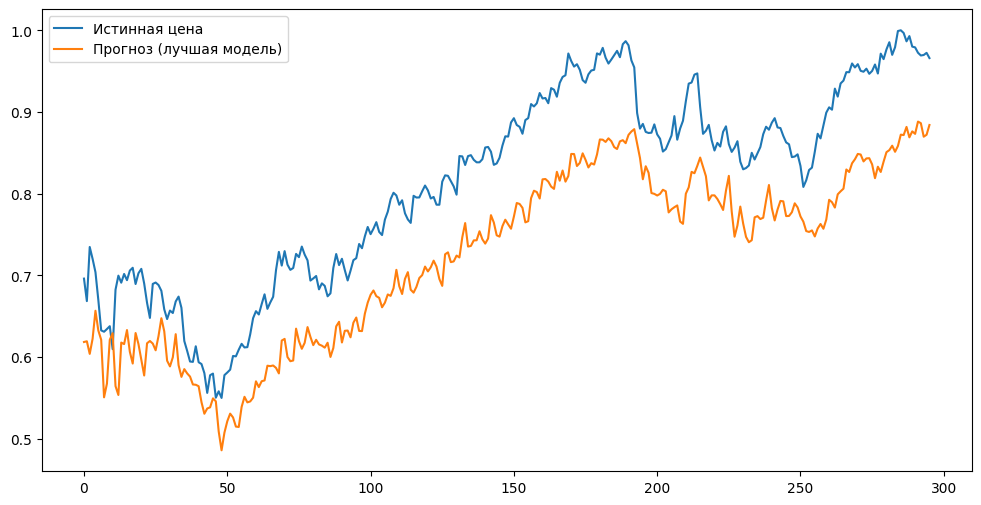

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Истинная цена")
plt.plot(y_pred_best, label="Прогноз (лучшая модель)")
plt.legend()
plt.show()

На графике видно, что оптимизированная модель воспроизводит общий тренд, но систематически занижает прогноз. Это указывает на:

эффект регуляризации (dropout=0.1),

сглаживание динамики из-за большого kernel_size=5,

склонность TCN усреднять значения при больших nb_filters.

В данной работе была построена базовая TCN-модель для прогнозирования временного ряда (цены закрытия акций Apple), а затем выполнена оптимизация гиперпараметров с помощью Grid Search и кросс-валидации TimeSeriesSplit.

1. Сравнение базовой и оптимизированной моделей

Базовая TCN-модель показала качество на тестовой выборке:
RMSE ≈ 0.0639

Оптимизированная модель, подобранная Grid Search, показала результат:
RMSE ≈ 0.0942

Несмотря на то что оптимизированная модель имела более низкий MSE во время кросс-валидации, на реальной тестовой выборке она показала себя хуже. На графике видно, что она воспроизводит общий тренд, но заметно занижает значения прогноза.

2. Почему Grid Search дал хуже?

Полученные оптимальные параметры:

kernel_size = 5

nb_filters = 64

nb_stacks = 1

dropout_rate = 0.1

Эти значения приводят к следующим эффектам:

Большой kernel_size и сильные dilations сглаживают колебания временного ряда модель теряет локальные детали.

Много фильтров (64) делает модель более “усредняющей”  она выдаёт плавный прогноз вместо динамичного.

Dropout = 0.1 усиливает регуляризацию, что также сглаживает выход.

В результате оптимизированная модель хорошо работает на среднем уровне (по CV), но хуже адаптируется к реальным колебаниям ряда.

3. Главный вывод

TCN хорошо подходит для задач временных рядов, так как использует причинные и расширенные свёртки, обеспечивая большую глубину без рекуррентных слоёв.

Однако гиперпараметры TCN сильно влияют на степень сглаживания прогноза.

Grid Search не всегда улучшает качество финального прогноза, особенно на данных с выраженной локальной волатильностью.

Базовая TCN-модель оказалась лучше оптимизированной на тестовых данных благодаря более сбалансированным параметрам (меньший kernel_size и nb_filters).

4. Итог

TCN — мощная альтернатива RNN/LSTM для временных рядов, но её необходимо тщательно настраивать.
Grid Search улучшил результат на CV, но на реальных данных базовая модель оказалась точнее.
Основной фактор — переусреднение и сглаживание прогнозов из-за слишком «широких» структурных гиперпараметров.